In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import zscore

In [2]:
import sys
import os

ROOT_DIR = "../../"
sys.path.insert(0, os.path.abspath(ROOT_DIR + "/src"))
import visualization.visualization as vs
import scraping.preprocessing as pr

In [3]:
vs.init_plot_settings()

<Figure size 1440x720 with 0 Axes>

***

In [31]:
df[df["name"].isna()].href

34338     https://store.steampowered.com/app/396420/_/
34484     https://store.steampowered.com/app/396420/_/
69668     https://store.steampowered.com/app/317160/_/
71908    https://store.steampowered.com/app/1001520/_/
79163    https://store.steampowered.com/app/1219280/_/
79830    https://store.steampowered.com/app/1001520/_/
82171     https://store.steampowered.com/app/409050/_/
82172     https://store.steampowered.com/app/409080/_/
82375     https://store.steampowered.com/app/409080/_/
Name: href, dtype: object

# Load data

In [4]:
# Load system requirements data
data = pd.read_csv(ROOT_DIR + "data/sys_reqs/1-19-2021.sys_reqs.csv")
# Load cpu hardware specs data
cpus = pd.read_csv(ROOT_DIR + "data/Intel_CPUs.csv")
cpus = cpus.dropna(subset=["Processor_Number"])
# Preprocess the system reqs data
df = pr.preprocess_data(data, cpus)

/home/chase0/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (24,34,38,40,41,43,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,86,87,88,89,90,91,92,93,94,95,96,97,98,100,101,102,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/chase0/projects/github/steam-games/src/scraping/preprocessin

In [5]:
df.head()

,name,href,release_date,min_processor,min_memory,min_graphics,min_storage
0,Rust,https://store.steampowered.com/app/252490/Rust/,2018-02-08,3.90,10.0,GTX 670 2GB / AMD R9 280 better,20.0
1,Counter-Strike: Global Offensive,https://store.steampowered.com/app/730/Counter...,2012-08-21,3.06,2.0,Video card must be 256 MB or more and should b...,15.0
2,Apex Legends™,https://store.steampowered.com/app/1172470/Ape...,2020-11-04,3.30,6.0,"AMD Radeon™ HD 7730, NVIDIA GeForce® GT 640",56.0
3,Destiny 2,https://store.steampowered.com/app/1085660/Des...,2019-10-01,3.50,6.0,NVIDIA® GeForce® GTX 660 2GB or GTX 1050 2GB /...,105.0
4,Phasmophobia,https://store.steampowered.com/app/739630/Phas...,2020-09-18,3.00,8.0,NVIDIA GTX 970 / AMD Radeon R9 290,16.0


***

# Add z-scores for all columns

In [6]:
import datetime

In [7]:
def convert_dt(time):
    if pd.isnull(time):
        return None
    return time.timestamp()

def get_zscores(col):
    if isinstance(col.iloc[0], datetime.datetime):
        col = col.apply(convert_dt)
    zscores = zscore(col, nan_policy="omit")
    
    return zscores

In [8]:
zscore_cols = df.keys().drop(["name", "href", "min_graphics"])
for col in zscore_cols:
    df[col + "_zscore"] = get_zscores(df[col])

/home/chase0/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


***

# Evaluate missingness

min_processor            69.001200
min_processor_zscore     69.001200
min_graphics             75.465721
min_storage              75.590210
min_storage_zscore       75.590210
min_memory               81.795750
min_memory_zscore        81.795750
release_date             89.031656
release_date_zscore      89.031656
name                     99.989996
href                    100.000000
dtype: float64

findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.


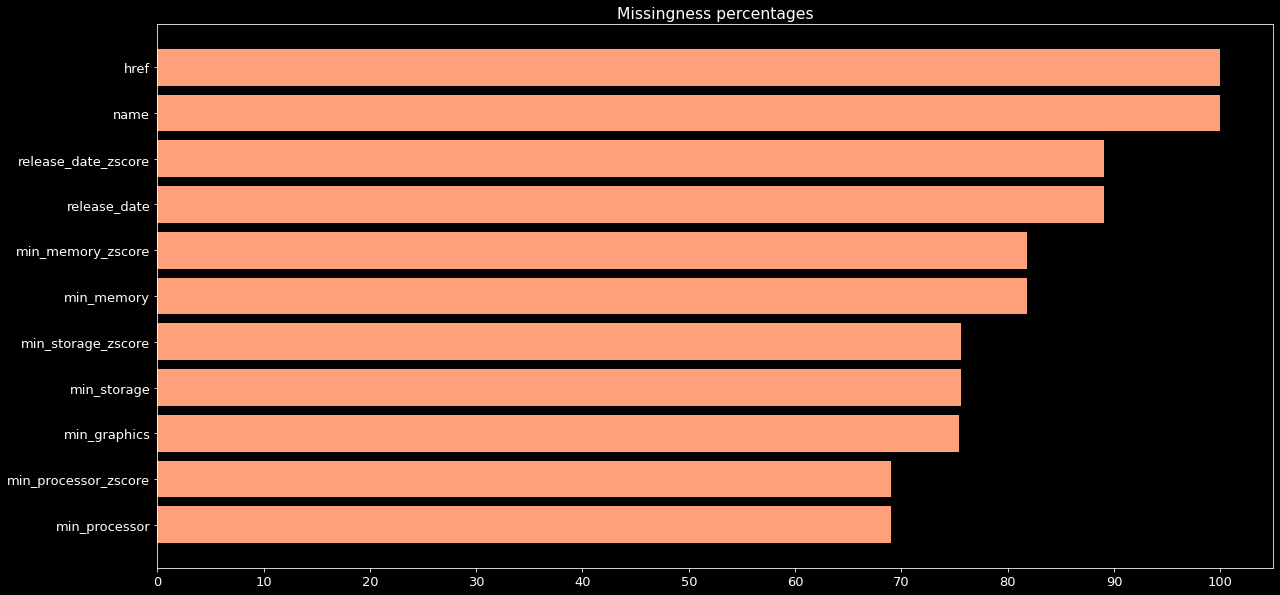

In [9]:
na_vals = df.notna().sum().sort_values() / df.shape[0] * 100
display(na_vals)
plt.barh(na_vals.index, na_vals, color="lightsalmon")
plt.title("Missingness percentages")
plt.xticks(np.linspace(0, 100, 11))
plt.show()

# Analyze min_processor

In [22]:
df["min_processor"].describe()

count    62079.000000
mean         2.668523
std         30.304662
min          0.000000
25%          1.700000
50%          2.200000
75%          3.000000
max       3000.000000
Name: min_processor, dtype: float64

## Processors with z-scores > 2 are extreme outliers

In [23]:
df["min_processor"][df["min_processor_zscore"] > 2]

15622    2400.0
15627    2400.0
34238     700.0
38791     200.0
42056    2400.0
43706    2400.0
44095    2400.0
59265    2400.0
69289    2000.0
76529    3000.0
80322    3000.0
Name: min_processor, dtype: float64

## Look at trimmed processor frequency distribution

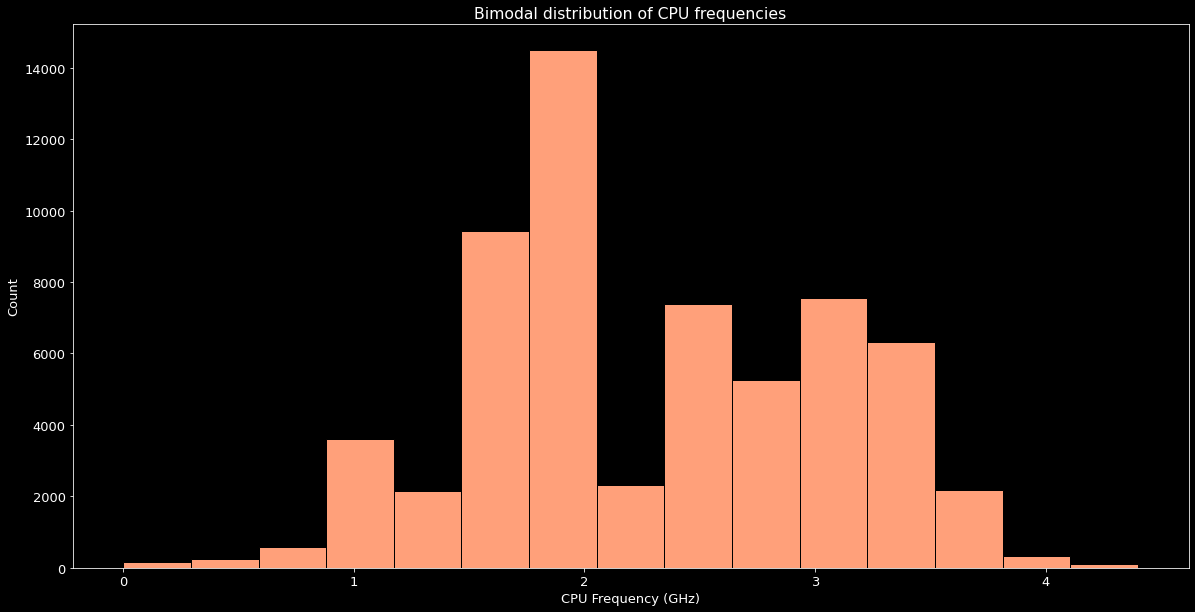

In [21]:
target_col = "min_processor"
proc_vals = df[abs(df[target_col + "_zscore"]) <= 2][target_col]
proc_vals = proc_vals.sort_values(ascending=False).reset_index(drop=True)
plt.hist(proc_vals, bins=15, color="lightsalmon", edgecolor="black")
plt.title("Bimodal distribution of CPU frequencies")
plt.ylabel("Count")
plt.xlabel("CPU Frequency (GHz)")
plt.show()

# Analyze min_graphics

# Analyze min_storage

In [11]:
df["min_storage"].describe()

count    68007.000000
mean         5.310048
std         70.217223
min          0.000000
25%          0.219500
50%          0.750000
75%          3.000000
max       9000.000000
Name: min_storage, dtype: float64

## Standard deviation and max values seem extremely high. Lets remove the biggest outliers and redo the z-scores

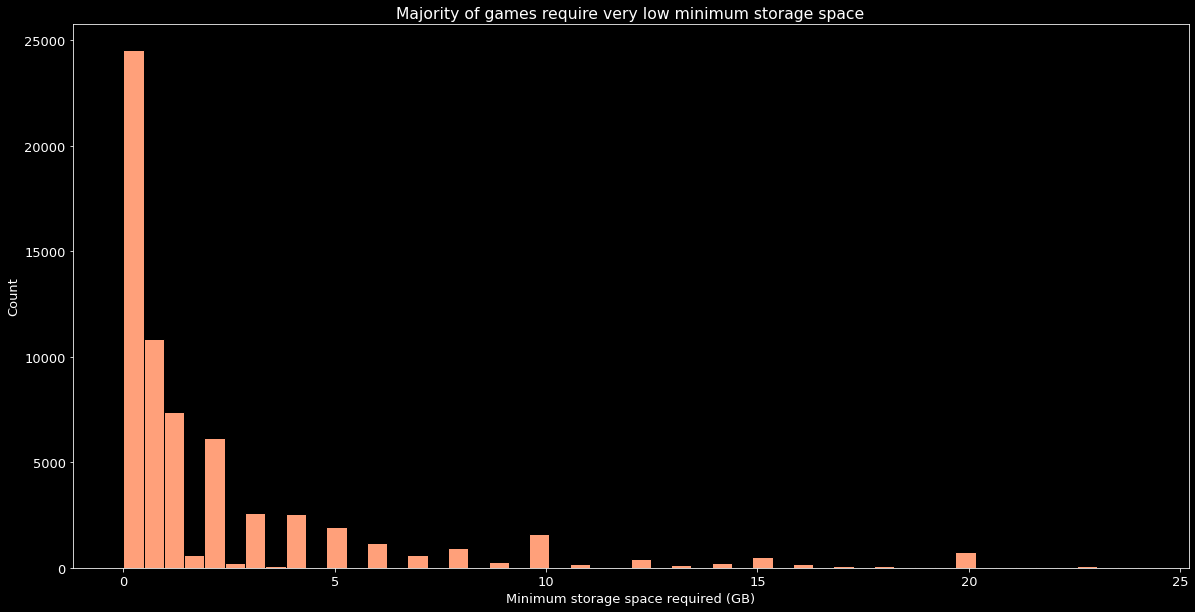

In [12]:
target_col = "min_storage"
# Remove anything requiring over a minimum of 200GBs of storage
stor_subset = df[df[target_col] < 200]
stor_subset_zscore = get_zscores(stor_subset[target_col])
# Of the remaining subset, trim down to +- 2 stds of the mean
stor_vals = stor_subset[abs(stor_subset_zscore) <= 2][target_col]

plt.hist(stor_vals, bins=50, color="lightsalmon", edgecolor="black")
plt.title("Majority of games require very low minimum storage space")
plt.xlabel("Minimum storage space required (GB)")
plt.ylabel("Count")
plt.show()

## It seems that games with a low storage space requirement dominate the steam store. Lets try reducing the maximum even further to get a clearer picture of things.

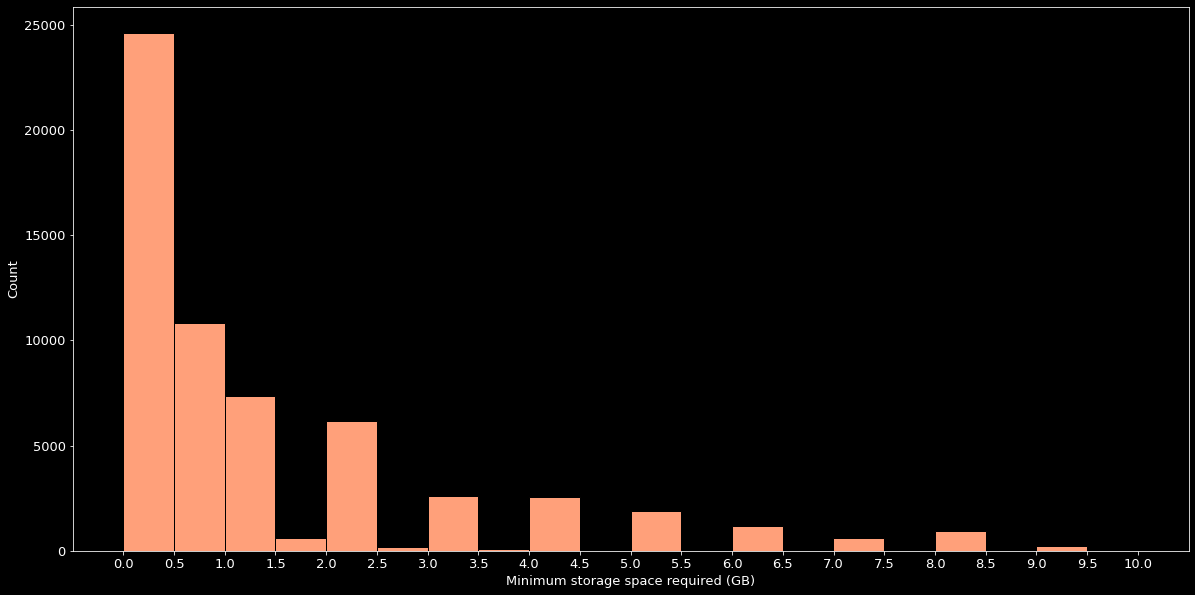

In [13]:
plt.hist(stor_vals[stor_vals < 10], color="lightsalmon", edgecolor="black", bins=20)
plt.xticks(np.arange(0, 10.5, 0.5))
plt.xlabel("Minimum storage space required (GB)")
plt.ylabel("Count")
plt.show()

In [14]:
(df["min_storage"] > 150).sum()

55

## Log-scaling to determine a linear relationship over the whole dataset

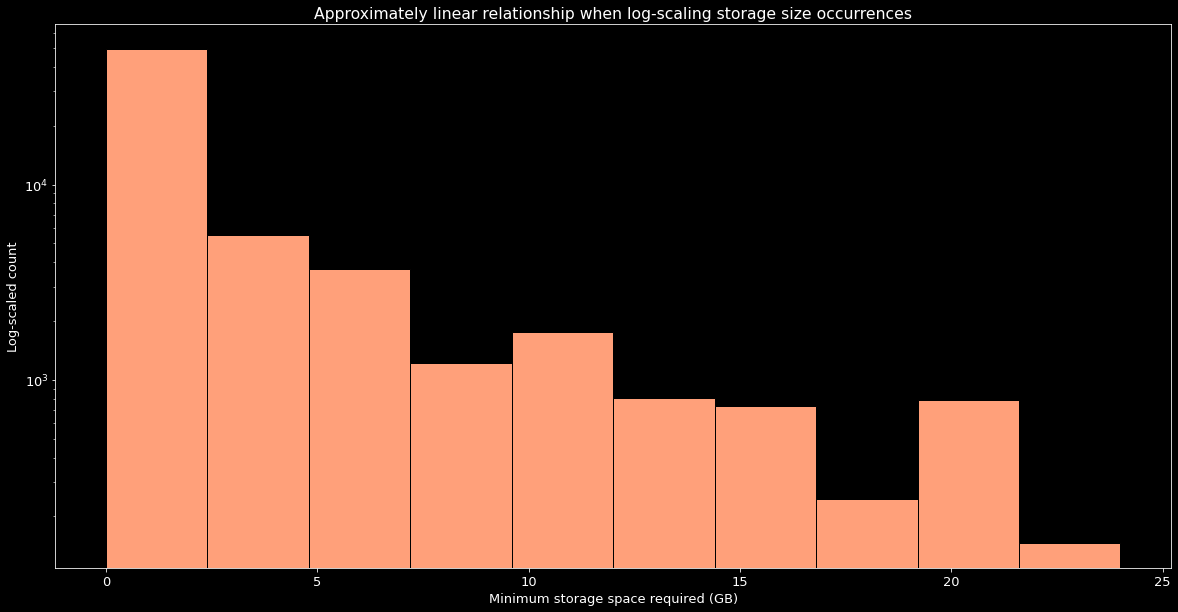

In [20]:
plt.hist(stor_vals, color="lightsalmon", edgecolor="black")
plt.yscale("log")
plt.title("Approximately linear relationship when log-scaling storage size occurrences")
plt.ylabel("Log-scaled count")
plt.xlabel("Minimum storage space required (GB)")
plt.show()

## Analyze min_memory

In [16]:
df["min_memory"].describe()

count    73590.000000
mean         3.321958
std         34.991028
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max       6000.000000
Name: min_memory, dtype: float64

### Standard deviation looks to be absurdly large, max is also far beyond the mean.
To accommodate for the extreme variation, we'll take a subset of realistic memory values and redo the z-scores.

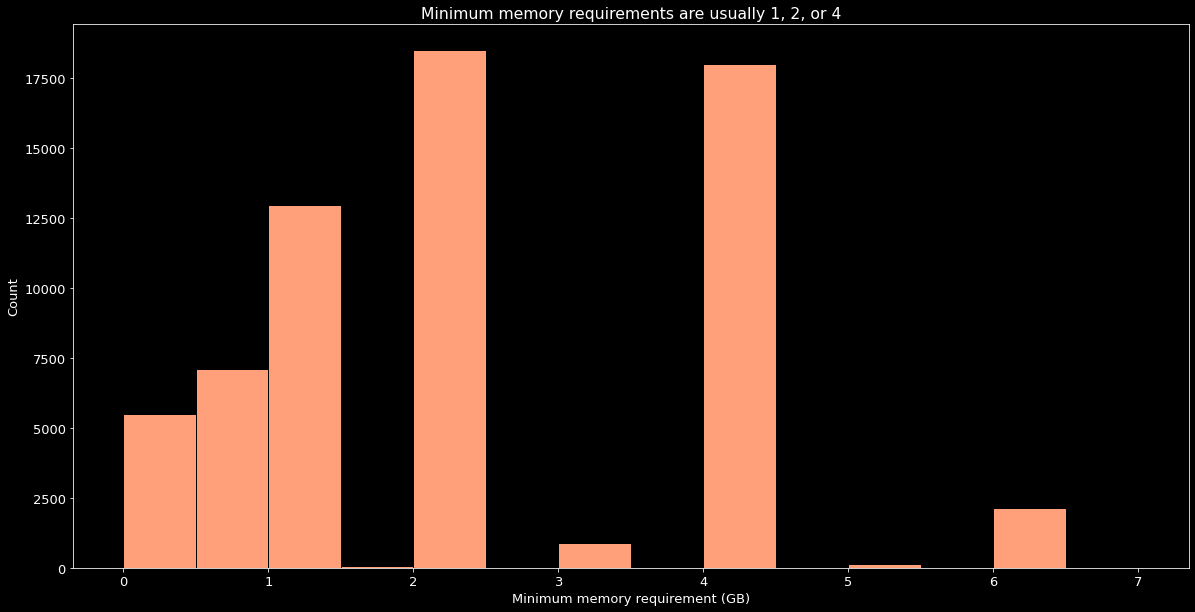

In [17]:
target_col = "min_memory"
mem_subset = df[df["min_memory"] < 100]
mem_subset_zscore = get_zscores(mem_subset["min_memory"])
mem_vals = mem_subset[abs(mem_subset_zscore) <= 2][target_col]
plt.hist(mem_vals, bins=int(max(mem_vals)) * 2, color="lightsalmon", edgecolor="black")
plt.title("Minimum memory requirements are usually 1, 2, or 4")
plt.xlabel("Minimum memory requirement (GB)")
plt.ylabel("Count")
plt.show()

## Analyze release date

2020    18179
2019    13816
2018    13329
2017    10543
2016     7524
2015     4871
2014     2847
2013     1475
2012     1174
2011      655
2010      459
2009      346
2008      240
2007      188
2006      164
2005      115
2004       77
2003       98
2002       55
2001       72
2000       59
Name: release_date, dtype: int64

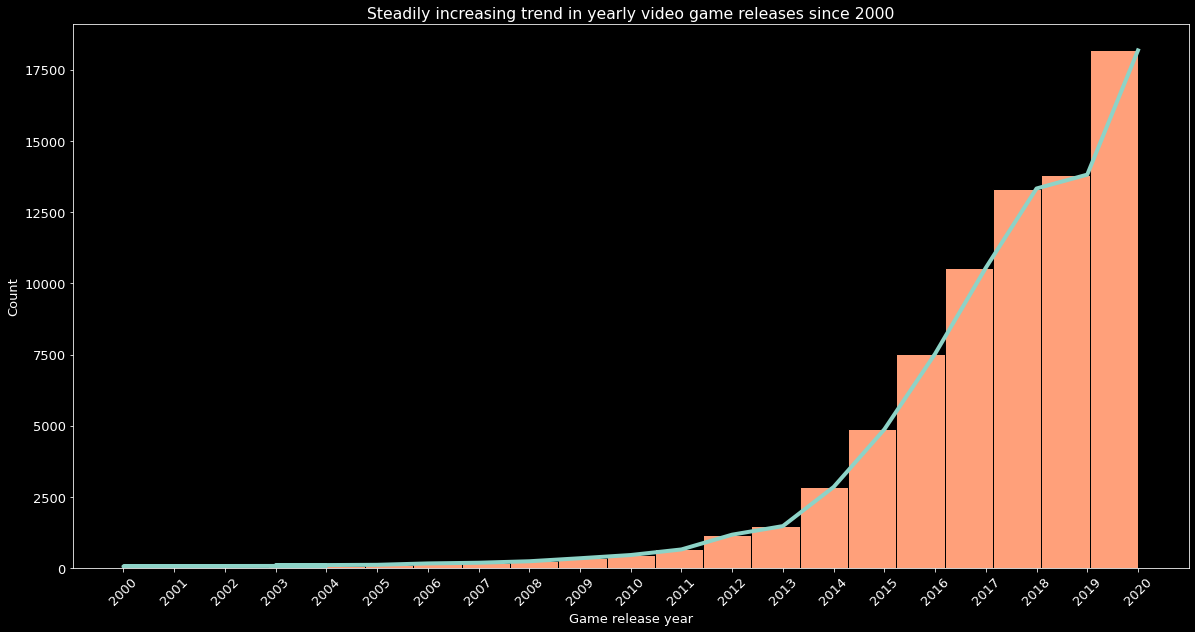

In [18]:
target_col = "release_date"
rdate_vals = df[abs(df[target_col + "_zscore"]) <= 2][target_col]

years = rdate_vals.apply(lambda row:row.year)
years = df["release_date"].dropna().apply(lambda row:row.year)
years = years[(years <= 2020) & (years >= 2000)]
years_range = np.linspace(min(years), max(years), max(years)-min(years)+1)

year_counts = years.value_counts().sort_index(ascending=False)
display(year_counts)

plt.title("Steadily increasing trend in yearly video game releases since 2000")
plt.xlabel("Game release year")
plt.ylabel("Count")
plt.hist(years, bins=len(years_range), color="lightsalmon", edgecolor="black")
plt.xticks(years_range, rotation=45)
plt.plot(years.value_counts(), linewidth=4)
plt.show()

## Rate of game development from year to year

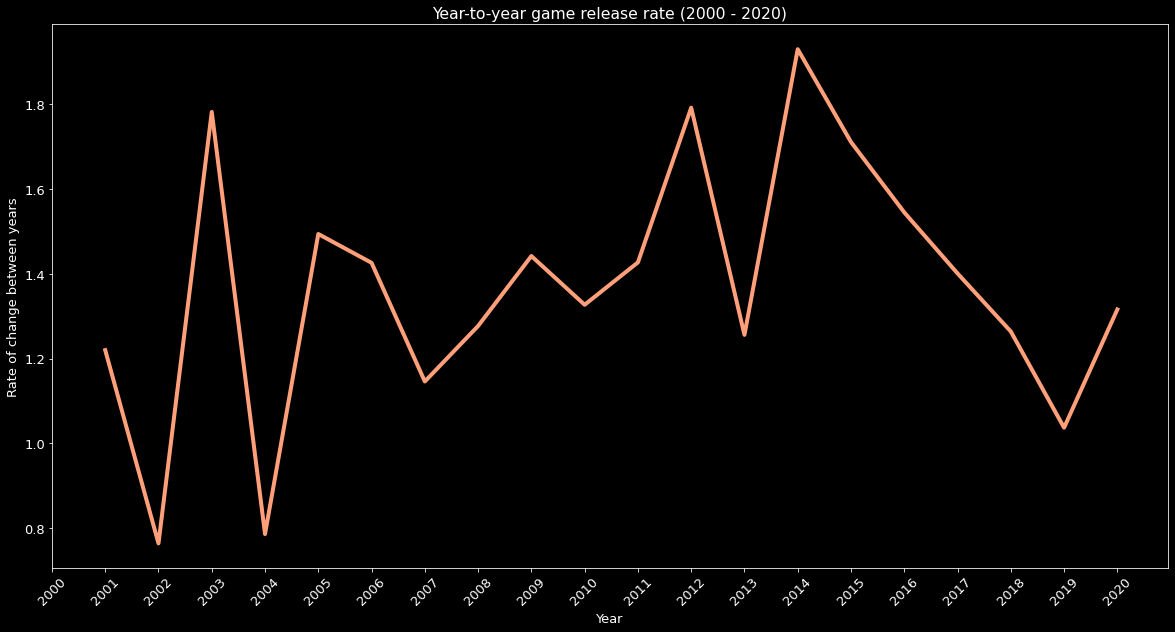

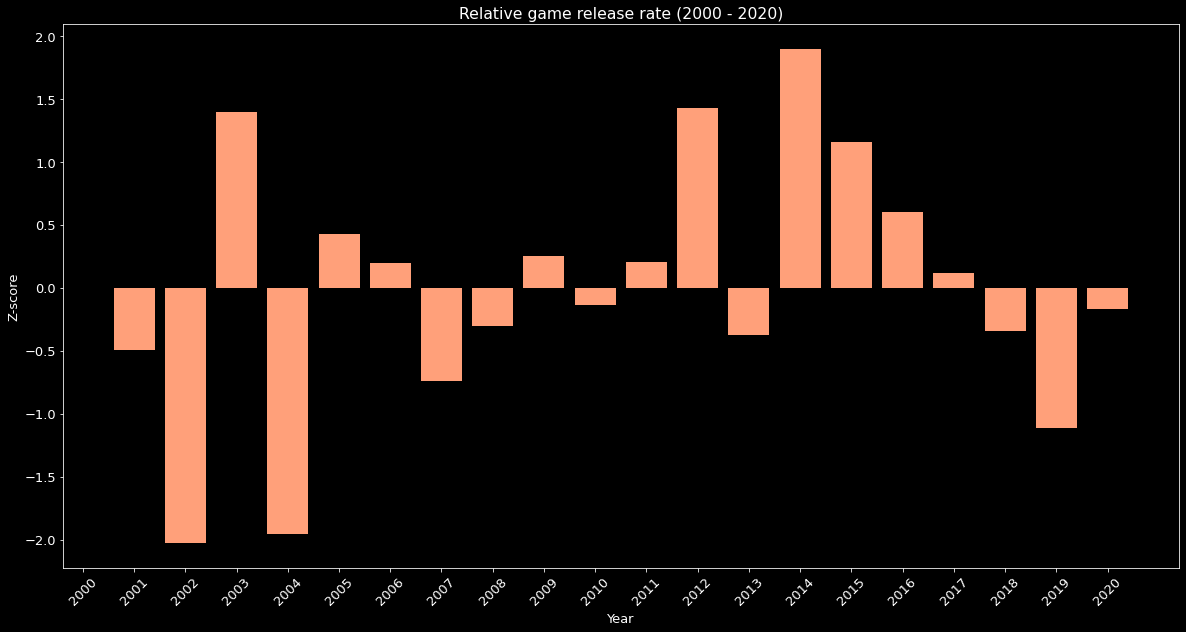

In [19]:
slopes = {}
for past_year, future_year, year in zip(year_counts[1:], year_counts[:-1], year_counts.index):
    slopes[year] = round(future_year/past_year, 3)
slopes = pd.Series(slopes)
slopes_zscores = pd.Series(zscore(slopes))

plt.plot(slopes, linewidth=4, color="lightsalmon")
plt.title("Year-to-year game release rate (2000 - 2020)")
plt.xlabel("Year")
plt.ylabel("Rate of change between years")
plt.xticks(np.linspace(2000, 2020, 21), rotation=45)
plt.show()

plt.bar(slopes.index, slopes_zscores, color="lightsalmon")
plt.title("Relative game release rate (2000 - 2020)")
plt.xlabel("Year")
plt.ylabel("Z-score")
plt.xticks(np.linspace(2000, 2020, 21), rotation=45)
plt.show()